Desarrollo práctico del proceso KDD de la práctica1

In [57]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [35]:
#Lista de variables
#En esta celda añadiremos la lista de variables con las que vamos a trabajar

centro = 260,-60 #Importamos las coordinadas centrales [ra,dec]
rango = 0.5 #El rango en el que vamos a trabajar (en grados)
columnas = ['source_id','ref_epoch','ra','dec','ra_error','dec_error','parallax','parallax_error'] #Y la lista de columnas


In [61]:
#Vamos a crear una función que usando la librería astropy podamos acceder a la base de datos GAIA dr3. Esta función necesitará los valores del centro y el rango
#La respuesta será un DataFrame con todas las columnas posibles de GAIA

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
Gaia.ROW_LIMIT = 2000
coord = SkyCoord(ra=centro[0], dec=centro[1], unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(rango, u.deg)
height = u.Quantity(rango, u.deg)


table = Gaia.query_object_async(coordinate=coord, width=width, height=height)
df = table.to_pandas()

INFO: Query finished. [astroquery.utils.tap.core]


In [62]:

#Vamos a introducir las columnas con las que vamos a trabajar, y después limpiaremos todas las filas vacías que podamos encontrar
tabla_gaia = df[columnas]
tabla_gaia.info()
tabla_gaia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source_id       2000 non-null   int64  
 1   ref_epoch       2000 non-null   float64
 2   ra              2000 non-null   float64
 3   dec             2000 non-null   float64
 4   ra_error        2000 non-null   float32
 5   dec_error       2000 non-null   float32
 6   parallax        1805 non-null   float64
 7   parallax_error  1805 non-null   float32
dtypes: float32(3), float64(4), int64(1)
memory usage: 101.7 KB


,source_id,ref_epoch,ra,dec,ra_error,dec_error,parallax,parallax_error
0,5915549033352192384,2016.0,259.999953,-60.001140,0.465417,0.406277,0.312084,0.571801
1,5915549029052269440,2016.0,260.003156,-59.998835,0.429875,0.344290,0.050997,0.504034
2,5915549033360817792,2016.0,260.001000,-60.002183,0.066298,0.057138,0.192470,0.081015
3,5915549029052267264,2016.0,259.995036,-60.000068,0.286976,0.234403,0.607468,0.334687
4,5915549033352192768,2016.0,259.994928,-59.999778,0.925558,0.728388,1.192310,0.907273
...,...,...,...,...,...,...,...,...
1995,5915549544448600832,2016.0,259.933972,-59.936544,0.110659,0.090969,0.273577,0.121451
1996,5915501921850926848,2016.0,260.142201,-60.008171,0.147510,0.126771,0.441739,0.189452
1997,5915503815931640960,2016.0,260.100041,-59.948861,0.483444,0.397778,1.026936,0.553052
1998,5915501445109534208,2016.0,260.100894,-60.050813,0.347495,0.309684,0.709678,0.457114


source_id           0
ref_epoch           0
ra                  0
dec                 0
ra_error            0
dec_error           0
parallax          195
parallax_error    195
dtype: int64

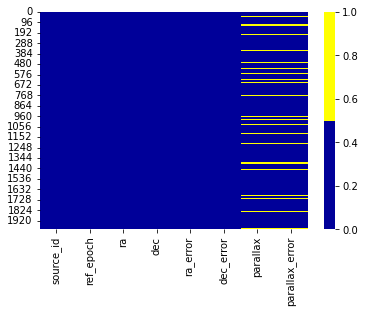

In [63]:
#Al tener ya control sobre el número de datos que tenemos y sus columnas, como estas están en el formato deseado
#Vamos a ver cuantas filas vacías hay en nuestro dataframe
cols = tabla_gaia.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(tabla_gaia[cols].isnull(), cmap=sns.color_palette(colours))
tabla_gaia.isnull().sum()

In [64]:
for col in tabla_gaia.columns:
    pct_missing = np.mean(tabla_gaia[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


source_id - 0%
ref_epoch - 0%
ra - 0%
dec - 0%
ra_error - 0%
dec_error - 0%
parallax - 10%
parallax_error - 10%


<BarContainer object of 2 artists>

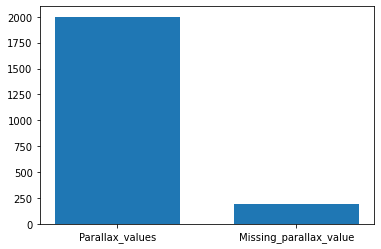

In [71]:
for col in tabla_gaia.columns:
    missing = tabla_gaia[col].isnull()
    num_missing = np.sum(missing)
    
plt.bar(('Parallax_values', 'Missing_parallax_value'),(Gaia.ROW_LIMIT,num_missing), width=0.7)

In [78]:
#Vamos a eliminar las filas que presentan valores vacíos para el paralaje
tabla_gaia=tabla_gaia.dropna()
#Y como es muy común encontrarse valores duplicados en estas tablas, debido a que hay sistemas de estrellas binarios en los cuales se le asignan los mismos valores a los dos objetos
#que componen el sistema, vamos a eliminar cualquier fila vacía haciendo uso de drop_duplicares
tabla_gaia=tabla_gaia.drop_duplicates()
tabla_gaia

,source_id,ref_epoch,ra,dec,ra_error,dec_error,parallax,parallax_error
0,5915549033352192384,2016.0,259.999953,-60.001140,0.465417,0.406277,0.312084,0.571801
1,5915549029052269440,2016.0,260.003156,-59.998835,0.429875,0.344290,0.050997,0.504034
2,5915549033360817792,2016.0,260.001000,-60.002183,0.066298,0.057138,0.192470,0.081015
3,5915549029052267264,2016.0,259.995036,-60.000068,0.286976,0.234403,0.607468,0.334687
4,5915549033352192768,2016.0,259.994928,-59.999778,0.925558,0.728388,1.192310,0.907273
...,...,...,...,...,...,...,...,...
1995,5915549544448600832,2016.0,259.933972,-59.936544,0.110659,0.090969,0.273577,0.121451
1996,5915501921850926848,2016.0,260.142201,-60.008171,0.147510,0.126771,0.441739,0.189452
1997,5915503815931640960,2016.0,260.100041,-59.948861,0.483444,0.397778,1.026936,0.553052
1998,5915501445109534208,2016.0,260.100894,-60.050813,0.347495,0.309684,0.709678,0.457114


In [77]:
tabla_gaia

,source_id,ref_epoch,ra,dec,ra_error,dec_error,parallax,parallax_error
0,5915549033352192384,2016.0,259.999953,-60.001140,0.465417,0.406277,0.312084,0.571801
1,5915549029052269440,2016.0,260.003156,-59.998835,0.429875,0.344290,0.050997,0.504034
2,5915549033360817792,2016.0,260.001000,-60.002183,0.066298,0.057138,0.192470,0.081015
3,5915549029052267264,2016.0,259.995036,-60.000068,0.286976,0.234403,0.607468,0.334687
4,5915549033352192768,2016.0,259.994928,-59.999778,0.925558,0.728388,1.192310,0.907273
...,...,...,...,...,...,...,...,...
1995,5915549544448600832,2016.0,259.933972,-59.936544,0.110659,0.090969,0.273577,0.121451
1996,5915501921850926848,2016.0,260.142201,-60.008171,0.147510,0.126771,0.441739,0.189452
1997,5915503815931640960,2016.0,260.100041,-59.948861,0.483444,0.397778,1.026936,0.553052
1998,5915501445109534208,2016.0,260.100894,-60.050813,0.347495,0.309684,0.709678,0.457114


In [91]:
#El siguiente paso será crear una nueva columna en donde almacenaremos el parallax_error*3, para así poder hacer el filtrado directamente en el paso posterior
parallax_error_3 = []
for row in tabla_gaia['parallax_error']:
    parallax_error_3.append(row*3)

tabla_gaia['parallax_error*3'] = parallax_error_3

tabla_gaia.info()
tabla_gaia.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1805 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   source_id         1805 non-null   int64  
 1   ref_epoch         1805 non-null   float64
 2   ra                1805 non-null   float64
 3   dec               1805 non-null   float64
 4   ra_error          1805 non-null   float32
 5   dec_error         1805 non-null   float32
 6   parallax          1805 non-null   float64
 7   parallax_error    1805 non-null   float32
 8   parallax_error*3  1805 non-null   float64
dtypes: float32(3), float64(5), int64(1)
memory usage: 184.4 KB


,source_id,ref_epoch,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_error*3
0,5915549033352192384,2016.0,259.999953,-60.001140,0.465417,0.406277,0.312084,0.571801,1.715404
1,5915549029052269440,2016.0,260.003156,-59.998835,0.429875,0.344290,0.050997,0.504034,1.512102
2,5915549033360817792,2016.0,260.001000,-60.002183,0.066298,0.057138,0.192470,0.081015,0.243045
3,5915549029052267264,2016.0,259.995036,-60.000068,0.286976,0.234403,0.607468,0.334687,1.004060
4,5915549033352192768,2016.0,259.994928,-59.999778,0.925558,0.728388,1.192310,0.907273,2.721819


In [ ]:
#Por tanto vamos a comprobar si los objetos son o no estrellas, añadiendo otra columna a modo de etiqueta con (star o no_star)